# Getting started with images

This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

* Read an image
* Check image attributes like datatype and shape
* Matrix representation of an image in `Numpy`
* Color images and splitting/merging image channels
* Displaying image using `Matplotlib`
* Saving image

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import zipfile as ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Download Assets

The `download_and_unzip()` is used to download and extract the notebook assets.

In [66]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [67]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

Invalid file. 'module' object is not callable


The opencv_bootcamp_assets_NB1.zip` file includes also contains the additional display_image.py python script

## Display image directly

We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [36]:
# Display 18x18 pixel image.
Image(filename="data/checkerboard_18x18.png")

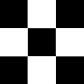

In [37]:
# Display 84x84 pixel image.
Image(filename="data/checkerboard_84x84.jpg")

## Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the `cv2.imread()` function which has the following syntax:

### <font color="green">Function Syntax</font>

```python
retval = cv2.imread( filename[, flags] )
```
`retval`: is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:

1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument.**
2. `Flags`: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**

1. `cv2.IMREAD_GRAYSCALE` or `0`: Loads image in grayscale mode.
2. `cv2.IMREAD_COLOR` or `1`: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. `cv2.IMREAD_UNCHANGED` or `-1`: Loads image as such including alpha channel.

### <font color="green">OpenCV Documentation</font>

1. **Imread**: [Documentation link](https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
2. **ImreadModes**: [Documentation link](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)

In [38]:
# Read image as gray scale.
cb_image = cv2.imread("data/checkerboard_84x84.jpg", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0, 255]
print(cb_image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Display image attributes

In [39]:
# Print the size of image
print("Image size (H, W) is:", cb_image.shape)

# Print data-type of image
print("Data type of image is:", cb_image.dtype)

Image size (H, W) is: (84, 84)
Data type of image is: uint8


## Display Images using Matplotlib

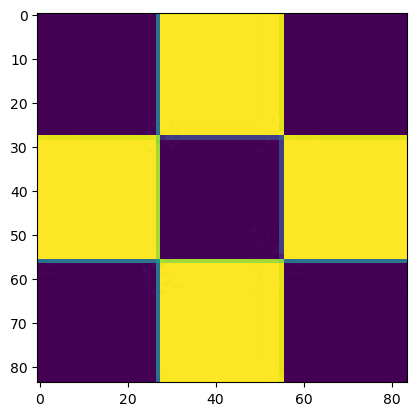

In [40]:
# Display image.
plt.imshow(cb_image)

## What happened?

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

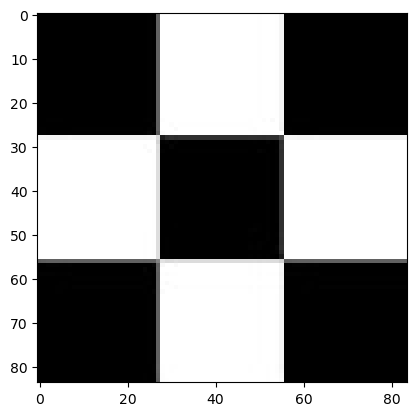

In [41]:
# Set color map to gray scale for proper rendering
plt.imshow(cb_image, cmap="gray")

## Another example

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


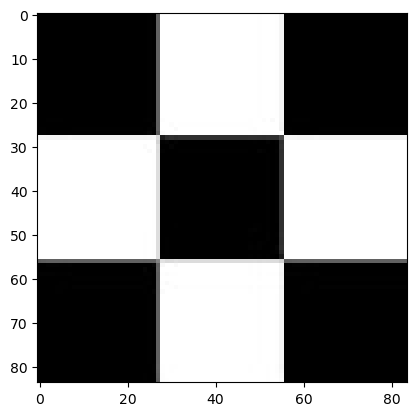

In [42]:
# Read image as a gray scale.
cb_image_fuzzy = cv2.imread("data/checkerboard_84x84.jpg", 0)

# print image
print(cb_image_fuzzy)

# Display image.
plt.imshow(cb_image_fuzzy, cmap="gray")

## Working with Color Images

Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

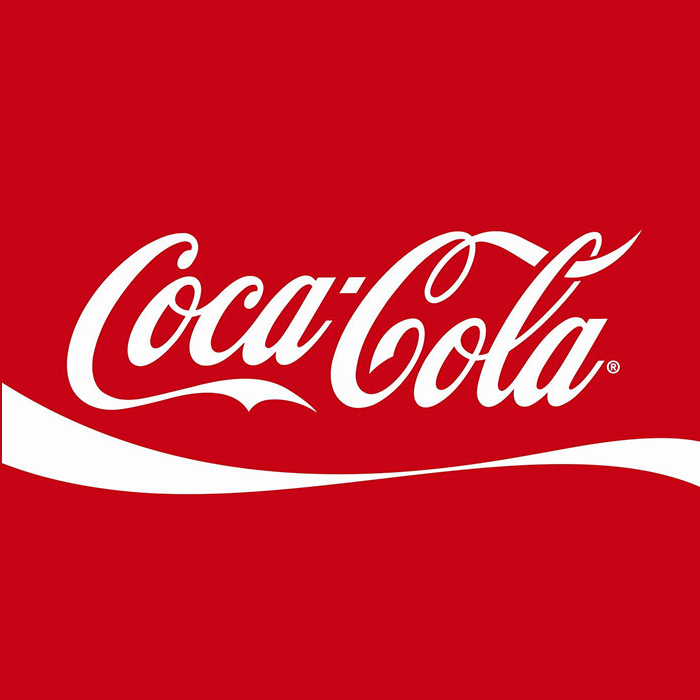

In [43]:
# Read and display Coca-Cola logo.
Image("data/coca-cola-logo.png")

## Read and display color image

Let us read a color image and check the parameters. Note the image dimension.

In [44]:
# Read an image
coke_img = cv2.imread("data/coca-cola-logo.png", 1)

# Print the size of the image
print("Image size (H, W, C) is:" , coke_img.shape)

# Print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


## Display the Image

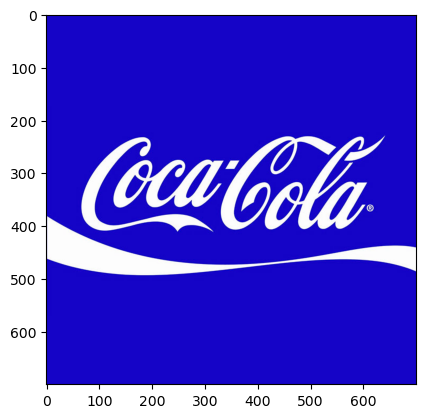

In [45]:
plt.imshow(coke_img)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channel the sections below.

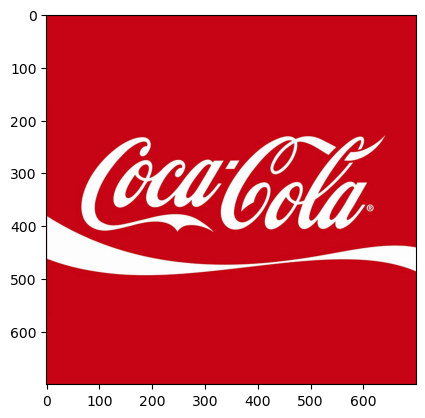

In [46]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

## Splitting and merging color channels

* `cv2.split()` Divides a multi-channel array into several single-channel arrays.
* `cv2.merge()` Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font color="green">OpenCV Documentation</font>

[Documentation Link](https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)

Text(0.5, 1.0, 'Merged Output')

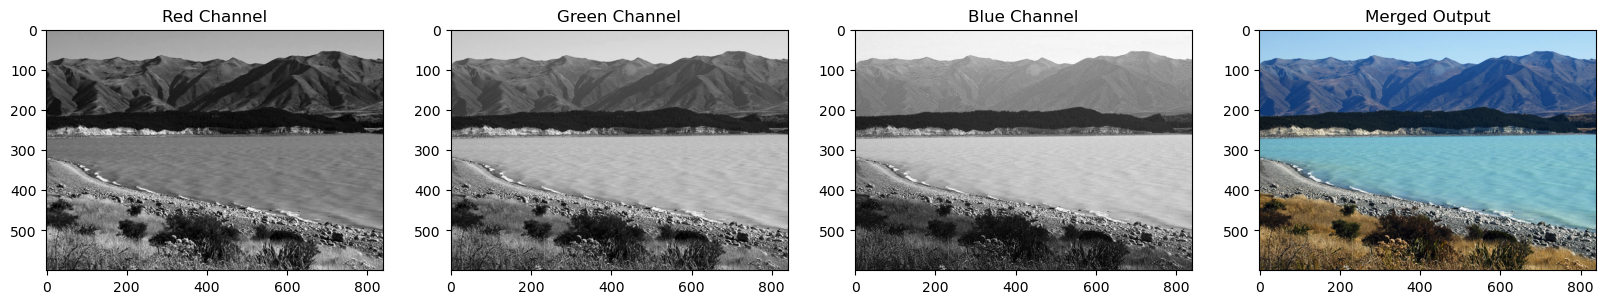

In [49]:
# Split the image into the B, G, R components
img_NZ_bgr = cv2.imread("data/New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

## Converting to different Color Spaces

`cv2.cvtColor()` converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB, but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The forth, fifth and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font color="green">Function Syntax</font>

```python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments:**

1. `src` input image: 8-bit unsigned, 16-bit unsigned (CV_16UC...), or single-precision floating-point.
2. `code` color space conversion code (see ColorConversionCodes).

### <font color="green">OpenCV Documentation</font>

1. `cv2.cvtColor`: [Documentation link](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)
2. `ColorConversionCodes`: [Documentation link](https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

### Changing from BGR to RGB

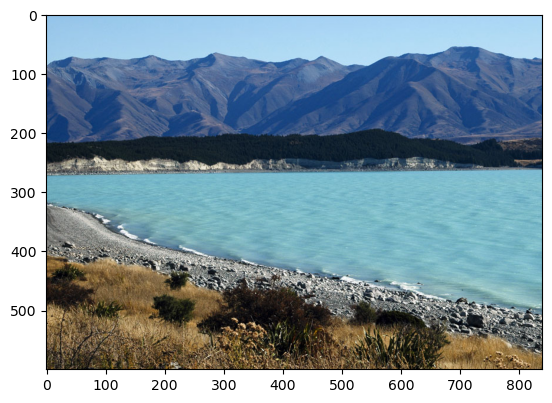

In [52]:
# OpenCV stores color channels in a different order than most other applications (BGR cs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space

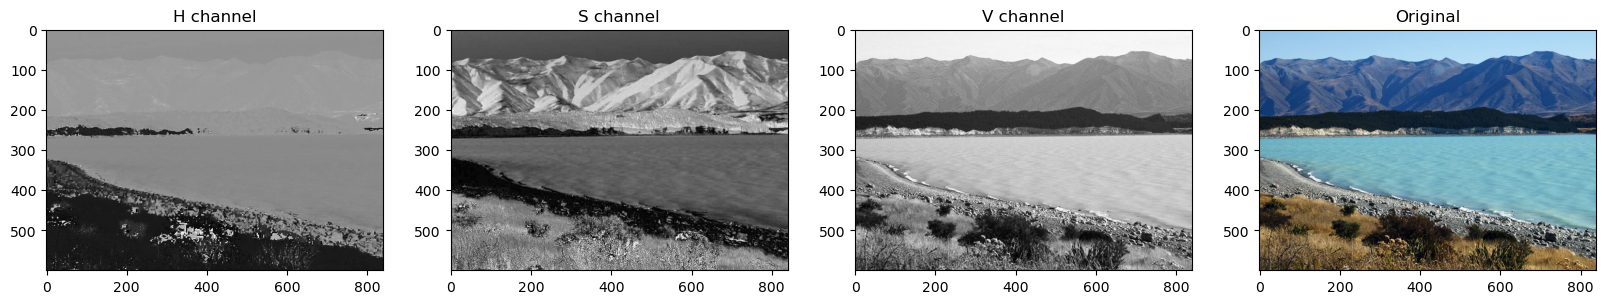

In [53]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h, s, v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V channel");
plt.subplot(144);plt.imshow(img_NZ_rgb); plt.title("Original");

### Modifying individual Channel

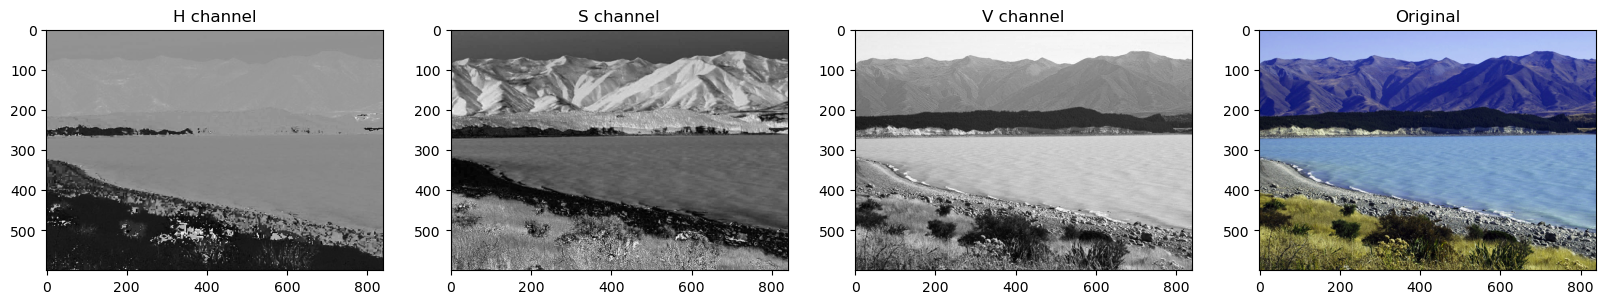

In [62]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h_new, cmap="gray");plt.title("H channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V channel");
plt.subplot(144);plt.imshow(img_NZ_rgb, cmap="gray");plt.title("Original");

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function `cv2.imwrite()` with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

### <font color="green">Function Syntax</font>

```python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments:**

1. `filename`: This can be an **absolute** or **relative** path.
2. `img`: Image or Images to be saved.

### <font color="green">OpenCV Documentation</font>

1. [Imwrite](https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)
2. [ImwriteFlags](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac)

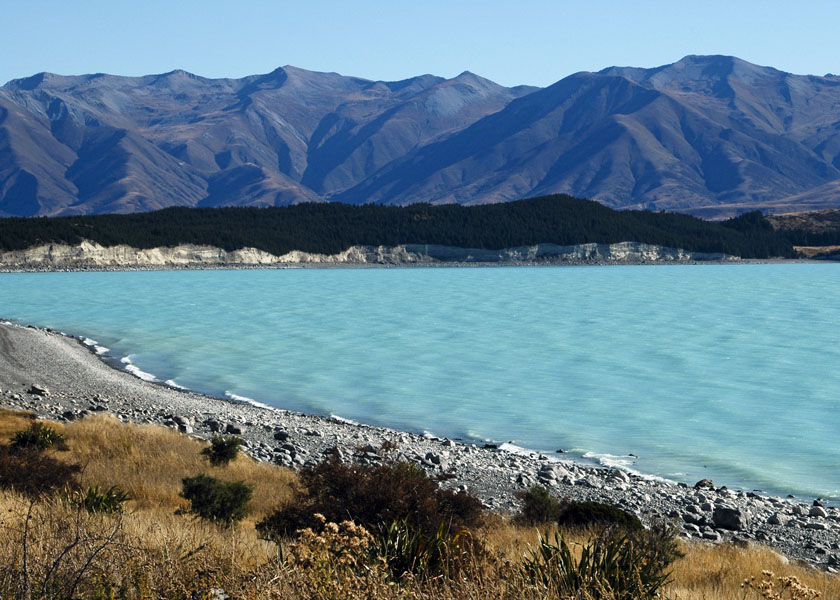

In [70]:
# Save the image
filename = "data/New_Zealand_Lake_SAVED.png"
cv2.imwrite(filename, img_NZ_bgr)

Image(filename=filename)

In [65]:
# read the image as Color
img_NZ_bgr = cv2.imread(filename, cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

#  read the image as Grayscaled
img_NZ_gry = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W, C) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W, C) is: (600, 840)
